In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
encoding_dim = 32

In [3]:
input_img = Input(shape = (784,))

In [4]:
encoded = Dense(encoding_dim,activation = ('relu'))(input_img)

In [6]:
decoded = Dense(784,activation = ('relu'))(encoded)

In [8]:
autoencoder = Model(input_img,decoded)

In [9]:
encoder = Model(input_img,encoded) 

In [11]:
encoded_input= Input(shape = (encoding_dim,))

In [12]:
decoder_layer = autoencoder.layers[-1]


In [13]:
encoded_img = 0


In [14]:
decoder = Model(encoded_input,decoder_layer(encoded_input))

In [15]:
autoencoder.compile(optimizer = 'adadelta',loss = 'binary_crossentropy')

In [16]:
from keras.datasets import mnist

In [17]:
import numpy as np

In [18]:
(x_train,_),(x_test,_) = mnist.load_data()

In [21]:
x_train = x_train.astype('float32')/255

In [22]:
x_test = x_test.astype('float32')/255

In [25]:
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))

In [26]:
x_test = x_test.reshape((len(x_test),np.prod(x_train.shape[1:])))

In [27]:
print x_train.shape

(60000, 784)


In [31]:
autoencoder.fit(x_train, x_train,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s - loss: 0.4983 - val_loss: 0.3623
Epoch 2/10
60000/60000 [==============================] - 13s - loss: 0.3369 - val_loss: 0.3173
Epoch 3/10
60000/60000 [==============================] - 17s - loss: 0.2969 - val_loss: 0.2729
Epoch 4/10
60000/60000 [==============================] - 15s - loss: 0.2668 - val_loss: 0.2575
Epoch 5/10
60000/60000 [==============================] - 15s - loss: 0.2539 - val_loss: 0.2470
Epoch 6/10
60000/60000 [==============================] - 16s - loss: 0.2450 - val_loss: 0.2356
Epoch 7/10
60000/60000 [==============================] - 16s - loss: 0.2307 - val_loss: 0.2233
Epoch 8/10
60000/60000 [==============================] - 16s - loss: 0.2232 - val_loss: 0.2179
Epoch 9/10
60000/60000 [==============================] - 16s - loss: 0.2183 - val_loss: 0.2134
Epoch 10/10
60000/60000 [==============================] - 16s - loss: 0.2140 - val_lo

In [32]:
encoded_imgs = encoder.predict(x_test)

In [33]:
decoded_imgs = decoder.predict(encoded_imgs)

In [37]:
import matplotlib.pyplot as plt

In [38]:
n = 10

In [40]:
plt.figure(figsize = (20,4))

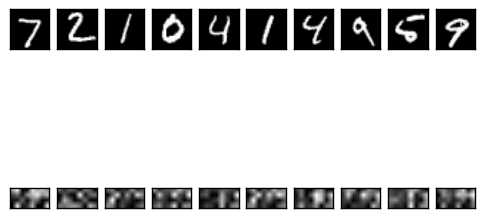

In [47]:
for i in xrange(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#     ax = plt.subplot(2,n,i+1+n)
#     plt.imshow(decoded_imgs[i].reshape(28,28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(encoded_imgs[i].reshape(4,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()